<a href="https://colab.research.google.com/github/JulieChemille/SVM/blob/main/Statistiques_Descriptives_TDSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistiques descriptives sur une base de données macro**

### Préparation de l'environnement et importation de la base

---



In [3]:
#Chargement des packages
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import plotly
import plotly.express as px
from IPython.display import HTML #pour afficher les graphs
# dans une cellule de notebook

In [ ]:
#Chargement de la base de données sur google colab
from google.colab import files
files.upload() 


In [5]:
bdd = pd.read_excel('1-Data_all_.xlsx')
db = pd.DataFrame(data=bdd)

Pour cette analyse des statistiques descriptives nous nous concentrerons sur l'année 2016 (la base de données étant constituée des mêmes variables sur les deux années).

In [6]:
db = db.iloc[:,:25] #on séléctionne toutes les lignes et toutes les colonnes jusqu'à la dernière variable "2016"

In [ ]:
db.columns #vérification 

Index(['Name', 'CROIS_2016', 'ELEC_2016', 'PI_2016', 'VA_2016', 'TTR_2016',
       'TXMORTI_2016', 'TXMORT_2016', 'IED_2016', 'EDVN_2016', 'PT_2016',
       'INF_2016', 'MASSM_2016', 'TXCH_2016', 'PA_2016', 'TRSM_2016',
       'CHO_2016', 'CMARCH_2016', 'X_2016', 'M_2016', 'FBCF_2016', 'TXF_2016',
       'TRSPRT_2016', 'ABTE_2016', 'TAGR_2016'],
      dtype='object')

In [ ]:
db.shape

(241, 25)

### Petite analyse *exploratoire*

---



In [7]:
db.info() #toutes nos variables sont correctement codées

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          241 non-null    object 
 1   CROIS_2016    230 non-null    float64
 2   ELEC_2016     239 non-null    float64
 3   PI_2016       181 non-null    float64
 4   VA_2016       217 non-null    float64
 5   TTR_2016      165 non-null    float64
 6   TXMORTI_2016  218 non-null    float64
 7   TXMORT_2016   229 non-null    float64
 8   IED_2016      223 non-null    float64
 9   EDVN_2016     224 non-null    float64
 10  PT_2016       240 non-null    float64
 11  INF_2016      231 non-null    float64
 12  MASSM_2016    181 non-null    float64
 13  TXCH_2016     196 non-null    float64
 14  PA_2016       211 non-null    float64
 15  TRSM_2016     188 non-null    float64
 16  CHO_2016      211 non-null    float64
 17  CMARCH_2016   225 non-null    float64
 18  X_2016        211 non-null    

In [8]:
#round(db.describe(),2)

In [9]:
db.isna().sum()

Name             0
CROIS_2016      11
ELEC_2016        2
PI_2016         60
VA_2016         24
TTR_2016        76
TXMORTI_2016    23
TXMORT_2016     12
IED_2016        18
EDVN_2016       17
PT_2016          1
INF_2016        10
MASSM_2016      60
TXCH_2016       45
PA_2016         30
TRSM_2016       53
CHO_2016        30
CMARCH_2016     16
X_2016          30
M_2016          30
FBCF_2016       46
TXF_2016        18
TRSPRT_2016     62
ABTE_2016       17
TAGR_2016        8
dtype: int64

In [10]:
na_list = db.isna().sum()
sum(na_list >= 30)

#j'aimerais supprimer les variables avec trop de NA : 

#for i in db.columns:
  #if na_list.values >= 30:
    #print(db[:,i])

#Echec, je fais sans.

11

In [11]:
db.dropna(inplace=True)

In [12]:
#db.isna().sum()

In [13]:
db.shape #grosse reduction de la base en terme d'individus

(69, 25)

In [14]:
#round(db.describe(),2) #Gros changements dans les stats descs

In [15]:
print("La moyenne du taux de croissance en 2016 (dans la BDD) était de " , round(db['CROIS_2016'].mean(),2), "%. ")

La moyenne du taux de croissance en 2016 (dans la BDD) était de  3.11 %. 


In [16]:
print("Le taux de croissance le + élevé en 2016 (dans la BDD) était" , round(db['CROIS_2016'].max(),2), "%. alors que le minimum était de :", round(db['CROIS_2016'].min(),2), "%.")

Le taux de croissance le + élevé en 2016 (dans la BDD) était 10.51 %. alors que le minimum était de : -3.28 %.


In [17]:
db['CROIS_2016'].idxmax()
#ici j'aurais bien aimé récupérer le nom du pays mais ça n'a pas de sens j'ai 140 en index (>taille DB)
#df.iloc[140,:]

140

###Partie graphique

In [18]:
# module permettant de générer des nb aléatoires
import random
# création de notre liste
list_var=[]
# notre boucle aura 15 itérations
for i in range(15):
   # on génère aléatoirement un chiffre compris entre 0 et 25 (nb de var)
   x=random.randint(0,25)
   # on vérifie que le chiffre n'est pas déjà dans list_var
   if x not in list_var:
      # appending the random number to the resultant list, if the condition is true
      list_var.append(x)
# printing the resultant random numbers list
print("les variables retirées sont")
print(list_var)

les variables retirées sont
[6, 5, 20, 19, 9, 3, 1, 17, 0, 13, 8]


In [21]:
#on ajoute 0 dans liste car nous aucun intérêt d'avoir des graphiques sur le nom des pays
if 0 not in list_var:
  list_var.append(0)

print("les variables retirées sont:", [13, 18, 4, 15, 14, 12, 21, 19, 9, 7, 20, 11, 5, 8, 3, 0])

les variables retirées sont: [13, 18, 4, 15, 14, 12, 21, 19, 9, 7, 20, 11, 5, 8, 3, 0]


In [22]:
db_2 = db.drop(db.columns[[13, 18, 4, 15, 14, 12, 21, 19, 9, 7, 20, 11, 5, 8, 3, 0]], axis=1) #mieux d'intégrer list_var ici
print("notre base est désormais de dimension", db_2.shape)

notre base est désormais de dimension (69, 9)


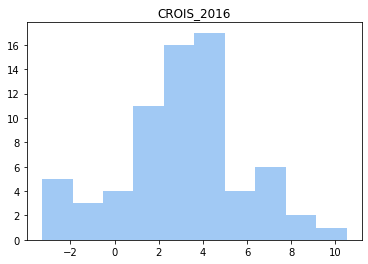

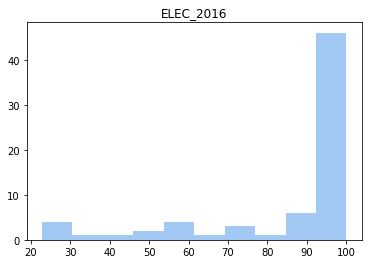

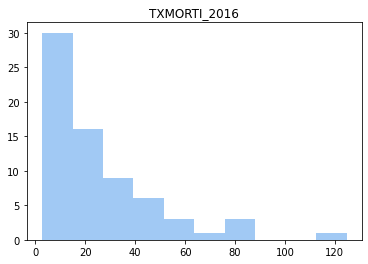

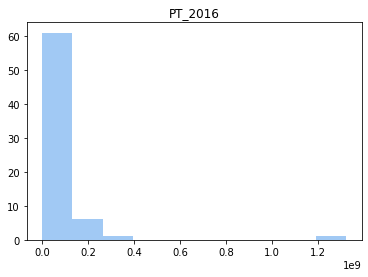

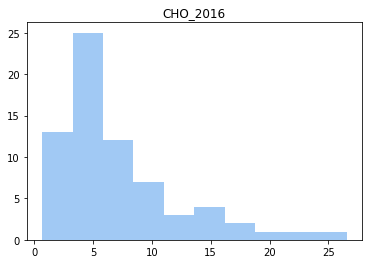

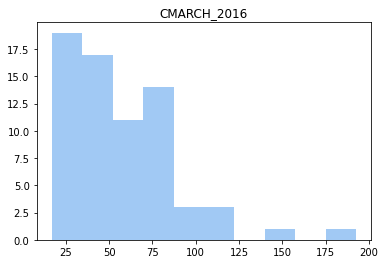

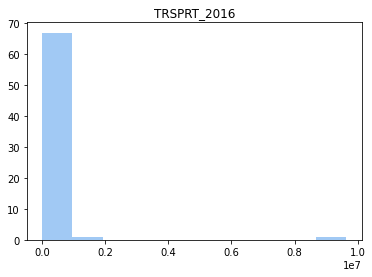

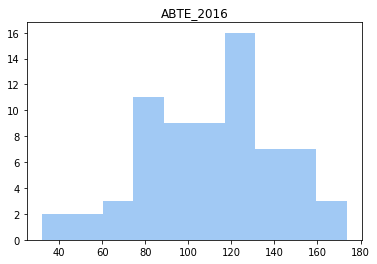

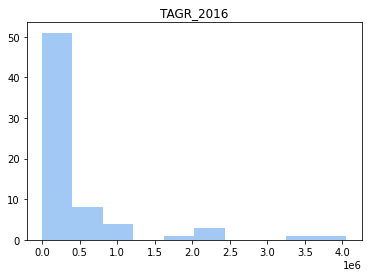

In [24]:
#On génère un histogramme pour chacune des variables

sns.set_palette("pastel")

for i in db_2.columns:
    
    plt.figure()
    plt.title(f'{i}')
    plt.hist(db_2[i])

#ça aurait pu être plus joli avec subplot

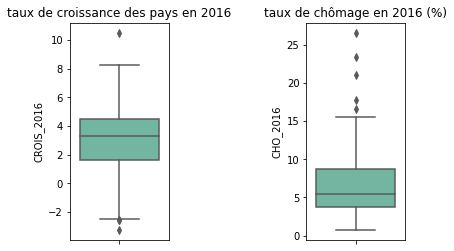

Il semble y avoir des individus potentiellement atypiques pour ces deux variables.


In [25]:
import seaborn as sns

sns.set_palette("Set2")

plt.subplot(1, 3, 1) # row 1, col 2 index 1
plt.title("taux de croissance des pays en 2016")
sns.boxplot(y=db_2['CROIS_2016'])


plt.subplot(1, 3, 3) # row 1, col 2 index 1
plt.title("taux de chômage en 2016 (%)")
sns.boxplot(y=db_2['CHO_2016'])

plt.show()
print("Il semble y avoir des individus potentiellement atypiques pour ces deux variables.")

In [ ]:
#!pip install OUTLIERS
from outliers import smirnov_grubbs as grubbs

#ça fonctionne pas dommage
#de toute façon ici ce n'est pas un test de grubbs car plus d'1 idv potentiellement atypique
#chercher autre méthode

In [27]:
#Fonction pour faire matrice des correlations
def correlation_matrix(df):
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    plt.figure(figsize=(10,10), dpi = 70)
    sns.heatmap(df.corr(), mask=mask, center=0, cmap='RdBu_r', 
                linewidths=1, annot=True, fmt=".2f")
    plt.title('Matrice des corrélations', fontsize = 13, fontweight='bold')
    plt.show()

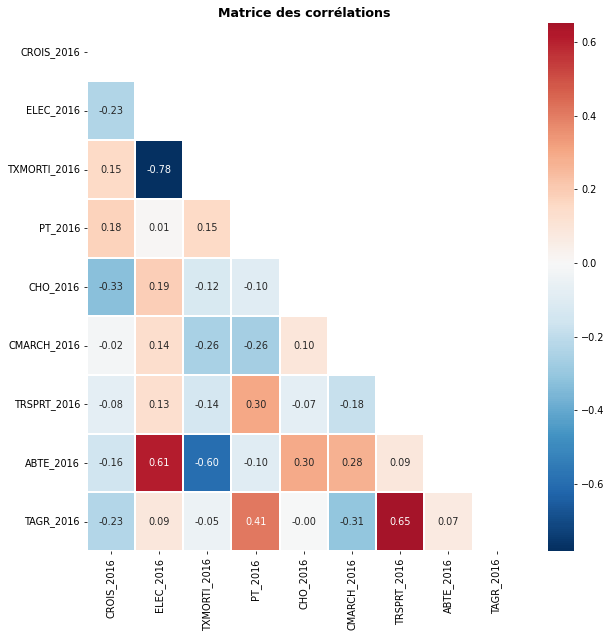

In [28]:
correlation_matrix(db_2)
#comme je ne me souviens pas de la signification de la plupart des variables
#on retiendra que le taux de mortalité est fortement corrélé négativement avec le % de la population ayant 
#accès à l'éléctricité ou encore que le taux de chômage est relativement corrélé négativement avec le taux de croissance ...

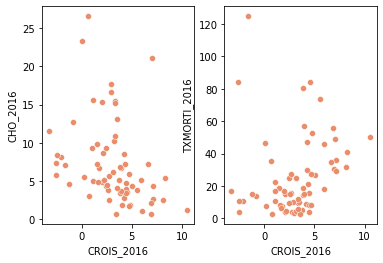

In [30]:
import seaborn as sns

sns.set_palette("flare")

plt.subplot(121)
plot = sns.scatterplot(x='CROIS_2016',y='CHO_2016',data=db_2)

plt.subplot(122) 
plot = sns.scatterplot(x='CROIS_2016',y='TXMORTI_2016',data=db_2)

#j'aimerais bien arriver à les séparer plus mais je n'arrive pas vraiment à manier figsize

In [35]:
import plotly.express as px
fig = px.scatter(db_2, x='CROIS_2016',y='TXMORTI_2016')
fig.show()